# Multiple Linear Regression and Regression Error Metrics

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df, kde=True)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

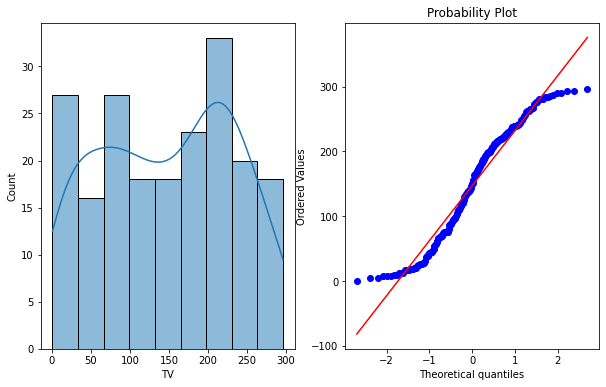

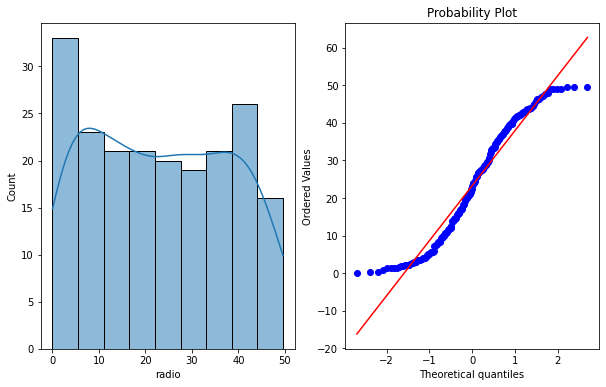

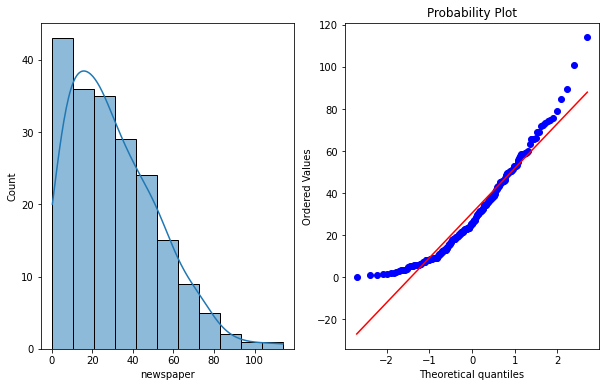

In [9]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

In [10]:
from scipy.stats import skew
for i in df.drop(columns="sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


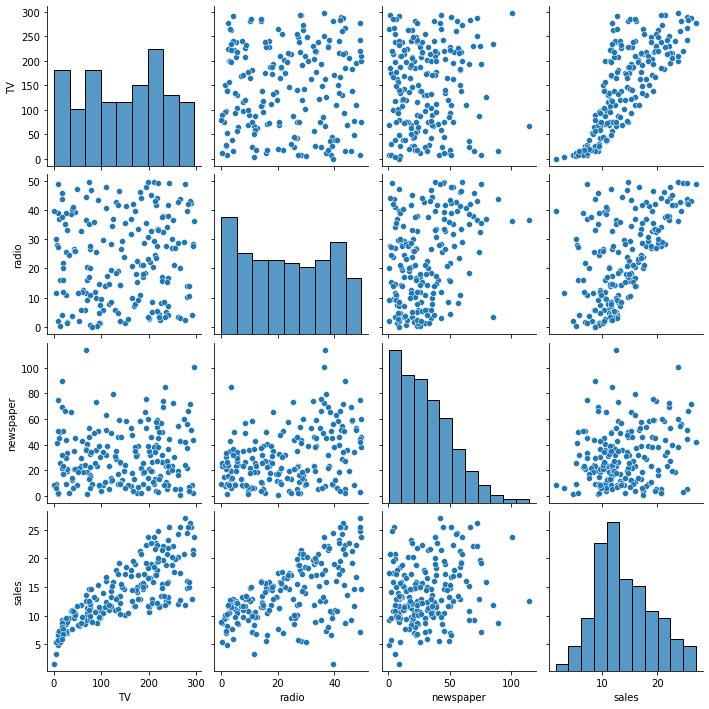

In [11]:
sns.pairplot(df);

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

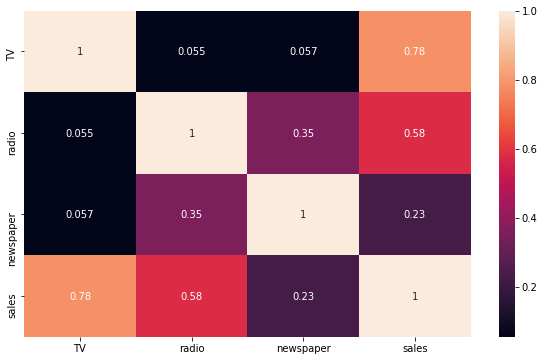

In [14]:
sns.heatmap(df.corr(), annot=True)

## Train-Test Split

In [15]:
X = df.drop(columns="sales")  # df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
df.sample(15)

,TV,radio,newspaper,sales
189,18.7,12.1,23.4,6.7
44,25.1,25.7,43.3,8.5
90,134.3,4.9,9.3,11.2
139,184.9,43.9,1.7,20.7
89,109.8,47.8,51.4,16.7
114,78.2,46.8,34.5,14.6
158,11.7,36.9,45.2,7.3
153,171.3,39.7,37.7,19.0
66,31.5,24.6,2.2,9.5
148,38.0,40.3,11.9,10.9


In [21]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [22]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [23]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [25]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [31]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual":y_test-y_pred}

In [33]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [36]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


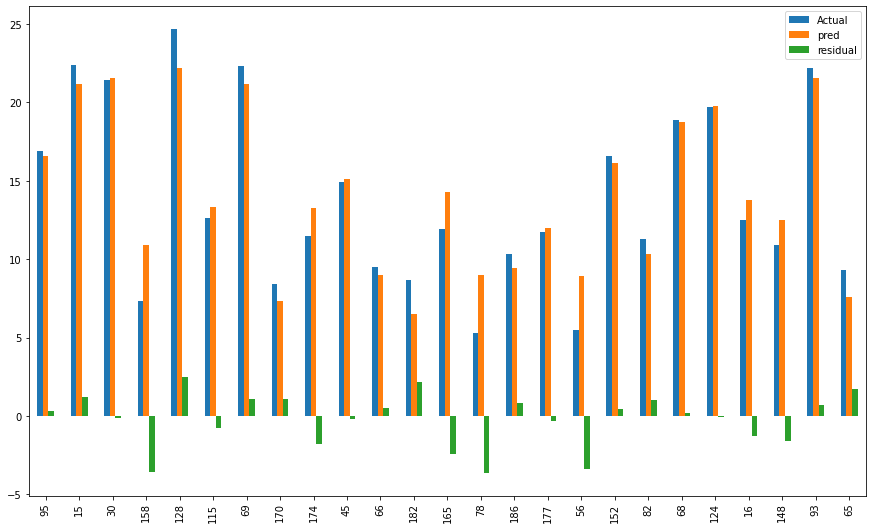

In [37]:
result_sample.plot(kind="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549086

In [41]:
mse = mean_squared_error(y_test, y_pred)
mse

3.7967972367152196

In [42]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446385

In [45]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [46]:
mae / sales_mean

0.10780311802138767

In [47]:
rmse / sales_mean

0.13895790367941796

## What is the concept of punishment for RMSE error metric?

In [55]:
variables = {"Actual":[1000, 2000, 3000], "pred":[1100, 2200, 3600]}  # Third pred was 3200

In [56]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3600


In [57]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [58]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3600,600


In [59]:
# mae
df_2.residual.sum()/3  # 166.66

300.0

In [60]:
# rmse
((df_2.residual**2).sum()/3)**0.5  # 173.20

369.68455021364724

## Evaluation Model

In [61]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [62]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549086
MSE 		: 3.7967972367152196
RMSE 		: 1.9485372043446385


In [63]:
y_train_pred = model.predict(X_train)

In [64]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.479355178905786
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

## Plotting residuals

In [67]:
residuals = y_test - y_pred

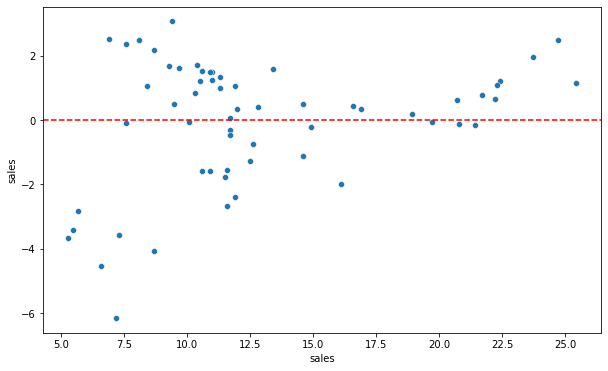

In [68]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y= residuals)  # -residuals
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

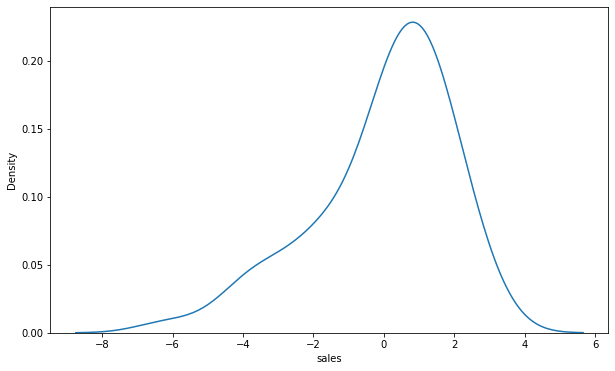

In [69]:
sns.kdeplot(residuals)

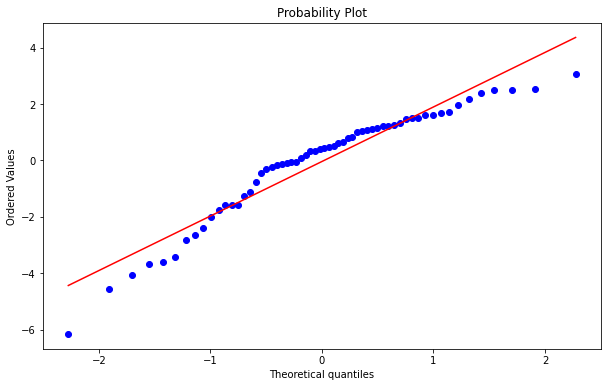

In [70]:
stats.probplot(residuals, dist = "norm", plot = plt);

In [71]:
skew(residuals)

-0.9865673346742719

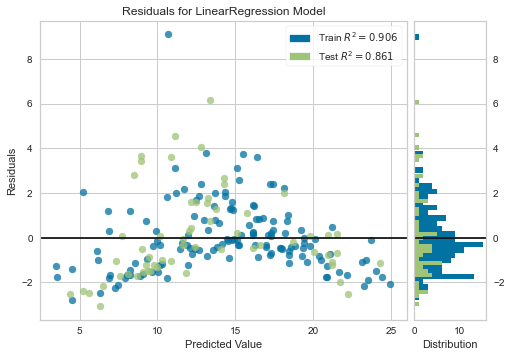

In [75]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

## Prediction Error for LinearRegression

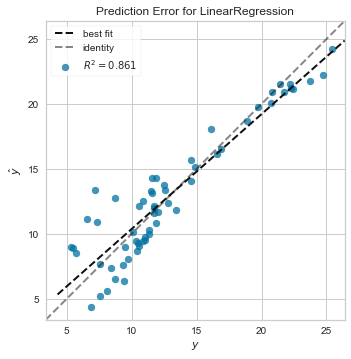

In [76]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Retraining Model on Full Data

In [77]:
final_model = LinearRegression()

In [78]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [79]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [80]:
final_model.intercept_

2.938889369459412

In [81]:
coef_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"])
coef_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [82]:
adv = [[150, 20, 15]]

In [83]:
final_model.predict(adv)

array([13.55862413])

In [84]:
0.045765*150 + 0.188530*20 + -0.001037*15 + final_model.intercept_

13.55868436945941

In [85]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [86]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

## The effect of features on the predicted label

In [88]:
coef_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [89]:
np.array(adv).reshape(3, 1)

array([[150],
       [ 20],
       [ 15]])

In [90]:
coef_df * np.array(adv).reshape(3, 1)

,Coefficient
TV,6.864697
radio,3.770600
newspaper,-0.015562


In [91]:
6.864697 / 13.55862413

0.5062974630892729

In [92]:
3.770600 / 13.55862413

0.2780960637191142

In [93]:
-0.015562 / 13.55862413

-0.0011477565755043907